In [1]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 2543, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2543 (delta 0), reused 1 (delta 0), pack-reused 2540
Receiving objects: 100% (2543/2543), 32.91 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (1407/1407), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 40.8 MB/s 
     |████████████████████████████████| 2.0 MB 67.4 MB/s 
     |████████████████████████████████| 237 kB 78.8 MB/s 
     |████████████████████████████████| 51 kB 2.2 MB/s 


In [2]:
import torch

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [6]:
!unzip /content/YOLOv6/Q3.zip

Archive:  /content/YOLOv6/Q3.zip
   creating: images/
   creating: images/test/
  inflating: images/test/0b47311f426ff926578c9d738d683e76_jpg.rf.58093f799a6f56c30830617ca44745ca.jpg  
  inflating: images/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.a07af6147d4a79376c182d2d95c639ec.jpg  
  inflating: images/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.49b342a7b1f6de3f0e328beaf094a945.jpg  
  inflating: images/test/33afc6085c4d5a8f2421c1adc5a1edbf_jpg.rf.642c5b5370e5900cae860045ade36211.jpg  
  inflating: images/test/410993714e325a1de3e394ffe860df3a_jpg.rf.ceda8f2165a9e8b314a6278acd02686f.jpg  
  inflating: images/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.437c663d542c17860c1e82c1fca878e6.jpg  
  inflating: images/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.280f9940defacbb5d840aef65a9257e5.jpg  
  inflating: images/test/654bb8835258b26c466b1c19893df451_jpg.rf.e4099f0bbd3b79210414bb32a47b437c.jpg  
  inflating: images/test/685b860d412b91f5d4f7f9e643b84452_jpg.rf.4271132b4ce08c4ec0987ab

In [8]:
!python tools/train.py --batch 32 --conf /content/YOLOv6/configs/yolov6m.py --epochs 150 --img-size 416 --data /content/YOLOv6/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, calib=False, check_images=False, check_labels=False, conf_file='/content/YOLOv6/configs/yolov6m.py', data_path='/content/YOLOv6/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=150, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp1', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 202/ labels: 202. 
0.0s for dataset initialization.
Convert to COCO format
100% 58/58 [00:00<00:00, 39517.48it/s]
Convert to COCO format finished. Resutls saved in /content/YOLOv6/annotations/instances_val.json
Val: Final numbers of valid images: 58/ labels: 58. 
0.0s for dataset initialization.
Model: Model(
  (

In [9]:
# evaluation
!python tools/eval.py --data /content/YOLOv6/data.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --device 0 

Namespace(batch_size=32, conf_thres=0.03, config_file='', data='/content/YOLOv6/data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=416, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='runs/train/exp1/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 34.24M, Gflops: 

In [12]:
!python tools/infer.py --yaml /content/YOLOv6/data.yaml --weights /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt --source /content/YOLOv6/images/test/

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/images/test/', view_img=False, weights='/content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt', yaml='/content/YOLOv6/data.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 29/29 [00:01<00:00, 25.18it/s]
Results saved to runs/inference/exp


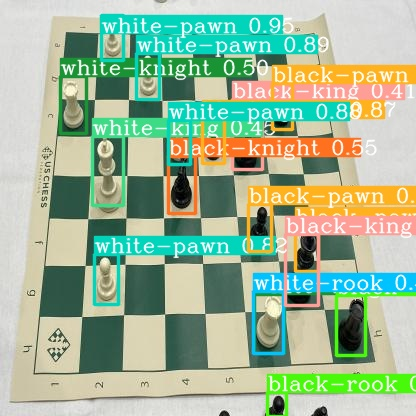

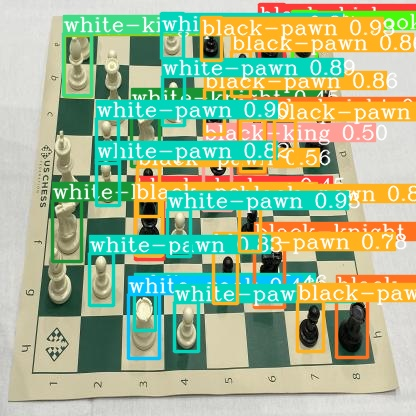

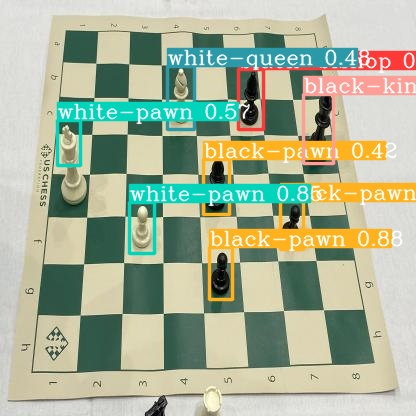

In [13]:
import glob
from IPython.display import Image, display

i = 0
limit = 3
for imageName in glob.glob('./runs/inference/exp/*.jpg'):
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [16]:
!zip -r /content/YOLOv6/inference.zip /content/YOLOv6/runs/inference

  adding: content/YOLOv6/runs/inference/ (stored 0%)
  adding: content/YOLOv6/runs/inference/exp/ (stored 0%)
  adding: content/YOLOv6/runs/inference/exp/e4583d082076b2b549b3736ad1b193c9_jpg.rf.55af0c9be903e4dda4a002af87bdeaac.jpg (deflated 2%)
  adding: content/YOLOv6/runs/inference/exp/2f6fb003bb89cd401322a535acb42f65_jpg.rf.49b342a7b1f6de3f0e328beaf094a945.jpg (deflated 1%)
  adding: content/YOLOv6/runs/inference/exp/cfc306bf86176b92ffc1afbb98d7896f_jpg.rf.2de0d2da0025b5993598f47fb1d51d10.jpg (deflated 3%)
  adding: content/YOLOv6/runs/inference/exp/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.280f9940defacbb5d840aef65a9257e5.jpg (deflated 6%)
  adding: content/YOLOv6/runs/inference/exp/410993714e325a1de3e394ffe860df3a_jpg.rf.ceda8f2165a9e8b314a6278acd02686f.jpg (deflated 2%)
  adding: content/YOLOv6/runs/inference/exp/c5a012dfa72816098d23fc8baee67834_jpg.rf.8b0e56e40c7c2429ce0e56797eb55c88.jpg (deflated 6%)
  adding: content/YOLOv6/runs/inference/exp/cf4769d0586df6b3fb0dc618d9f8abe6_jpg